I can assume I am working for a company that puts names on souvenirs.

First, I want to see what years my data is from

In [63]:
import pandas as pd

df = pd.read_csv('names_by_birth_year.csv')

print(df.head())

   Year       Name Gender  Count
0  1883       Mary      F   8012
1  1883       Anna      F   3306
2  1883       Emma      F   2367
3  1883  Elizabeth      F   2255
4  1883     Minnie      F   2035


In [64]:
print(df.tail())

         Year    Name Gender  Count
2085153  1994  Zedric      M      5
2085154  1994     Zef      M      5
2085155  1994    Zoey      M      5
2085156  1994    Zong      M      5
2085157  1994  Zuhair      M      5


Because the data only goes to 1994, I will just assume we are currently in 1995.

I want to see the male/female distribution

In [65]:
gender_counts = df['Gender'].value_counts()

print("Number of male entries:", gender_counts.get('M', 0))
print("Number of female entries:", gender_counts.get('F', 0))

Number of male entries: 857363
Number of female entries: 1227795


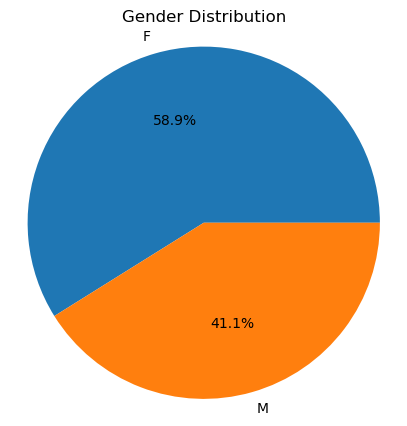

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')  
plt.show()

I want to see the top male and female names 

In [67]:
df = pd.read_csv('names_by_birth_year.csv')

male_df = df[df['Gender'] == 'M']

name_counts = male_df.groupby('Name')['Count'].sum()

top_10_male_names = name_counts.sort_values(ascending=False).head(10)

print("Top 10 male names:")
print(top_10_male_names)

Top 10 male names:
Name
James      5214844
John       5158428
Robert     4838129
Michael    4401604
William    4167487
David      3654723
Joseph     2647283
Richard    2572740
Charles    2417569
Thomas     2338310
Name: Count, dtype: int64


In [68]:
df = pd.read_csv('names_by_birth_year.csv')

female_df = df[df['Gender'] == 'F']

name_counts = female_df.groupby('Name')['Count'].sum()

top_10_female_names = name_counts.sort_values(ascending=False).head(10)

print("Top 10 female names:")
print(top_10_female_names)

Top 10 female names:
Name
Mary         4134713
Elizabeth    1668146
Patricia     1573024
Jennifer     1470012
Linda        1454120
Barbara      1435692
Margaret     1257878
Susan        1122752
Dorothy      1110081
Sarah        1090100
Name: Count, dtype: int64


Now, I want to see the top names only from recent years, because these are the people who will be buying products

In [69]:
filtered_df = df[(df['Year'] >= 1975) & (df['Year'] <= 1994)]

male_df = filtered_df[filtered_df['Gender'] == 'M']

name_counts = male_df.groupby('Name')['Count'].sum()

top_10_male_names = name_counts.sort_values(ascending=False).head(10)

print("Top 10 male names from 1975 to 1994:")
print(top_10_male_names)


Top 10 male names from 1975 to 1994:
Name
Michael        1276191
Christopher    1006316
Matthew         813048
David           729965
James           696115
Joshua          692043
John            626217
Daniel          625814
Robert          615230
Jason           601119
Name: Count, dtype: int64


In [70]:
filtered_df = df[(df['Year'] >= 1975) & (df['Year'] <= 1994)]

female_df = filtered_df[filtered_df['Gender'] == 'F']

name_counts = female_df.groupby('Name')['Count'].sum()

top_10_female_names = name_counts.sort_values(ascending=False).head(10)

print("Top 10 female names from 1975 to 1994:")
print(top_10_female_names)

Top 10 female names from 1975 to 1994:
Name
Jennifer     821040
Jessica      774894
Amanda       596585
Ashley       559736
Sarah        479127
Melissa      414529
Stephanie    396227
Nicole       373786
Elizabeth    370829
Heather      358011
Name: Count, dtype: int64


I want this info on bar charts

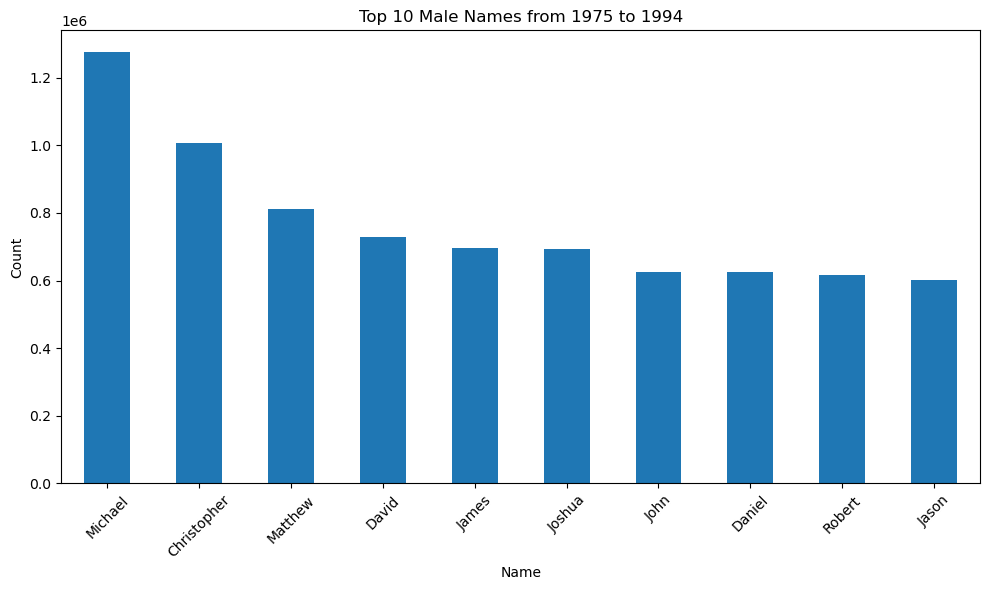

In [71]:
name_counts = male_df.groupby('Name')['Count'].sum()

top_10_male_names = name_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_male_names.plot(kind='bar')
plt.title('Top 10 Male Names from 1975 to 1994')
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


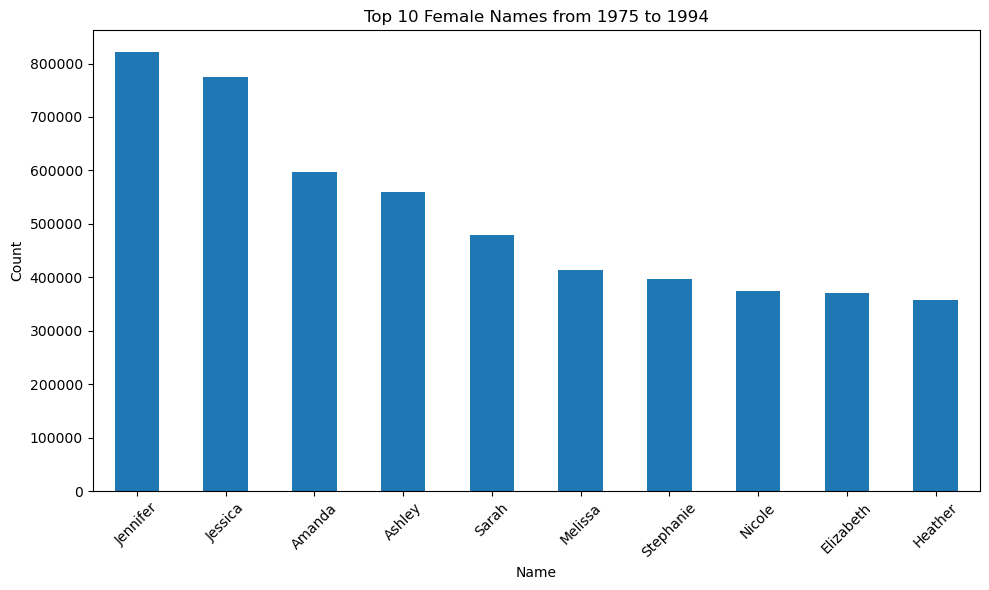

In [72]:
name_counts = female_df.groupby('Name')['Count'].sum()

top_10_female_names = name_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_female_names.plot(kind='bar')
plt.title('Top 10 Female Names from 1975 to 1994')
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

I am interested to see the same thing but just for the last five years. (Assume I am working in 1995) This would be helpful for putting names on baby items. 

In [73]:
filtered_df = df[(df['Year'] >= 1990) & (df['Year'] <= 1994)]

name_counts = filtered_df.groupby(['Gender', 'Name'])['Count'].sum()

top_male_names = name_counts.loc['M'].nlargest(10)
top_female_names = name_counts.loc['F'].nlargest(10)

print("Top 10 male names from 1990 to 1994:")
print(top_male_names)
print("\nTop 10 female names from 1990 to 1994:")
print(top_female_names)

Top 10 male names from 1990 to 1994:
Name
Michael        274538
Christopher    214966
Matthew        193621
Joshua         185626
Daniel         150658
Andrew         149083
David          144485
James          142408
Joseph         140607
Nicholas       138904
Name: Count, dtype: int64

Top 10 female names from 1990 to 1994:
Name
Jessica      195347
Ashley       192631
Brittany     131231
Amanda       127875
Samantha     122414
Sarah        122235
Emily        109253
Stephanie     99250
Elizabeth     94521
Jennifer      90477
Name: Count, dtype: int64


I want this info on pie and bar charts

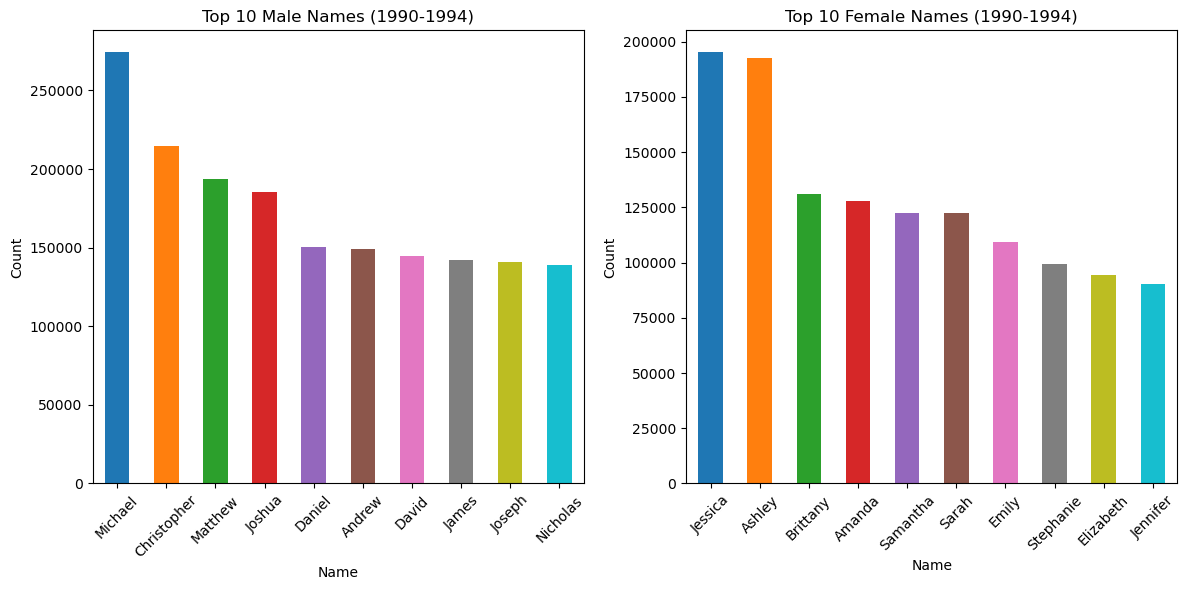

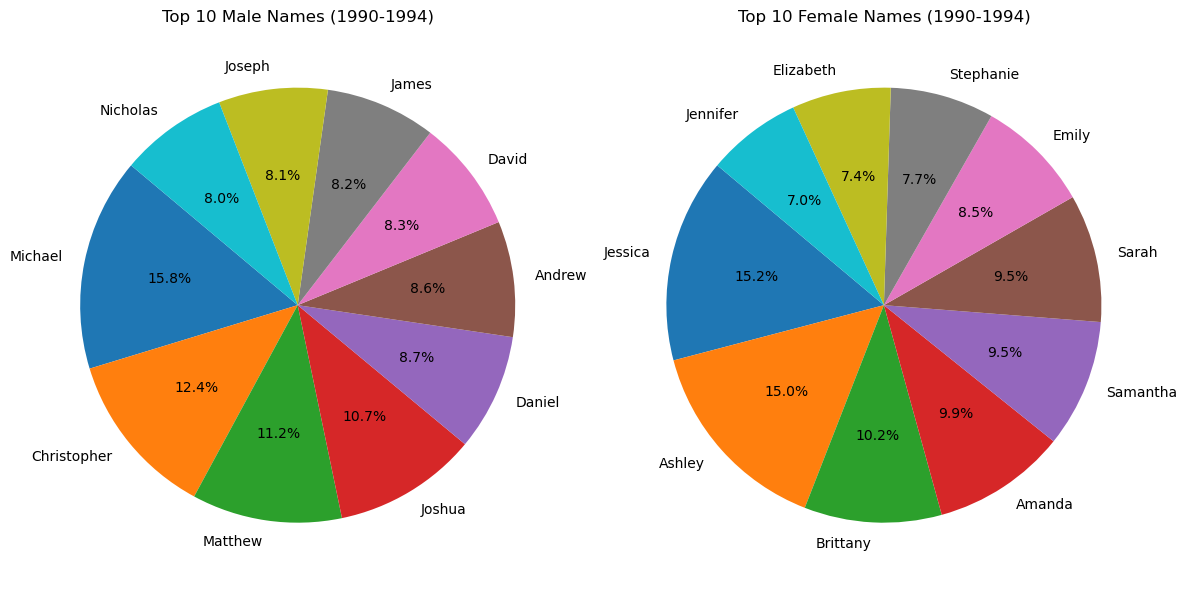

In [74]:
filtered_df = df[(df['Year'] >= 1990) & (df['Year'] <= 1994)]

name_counts = filtered_df.groupby(['Gender', 'Name'])['Count'].sum()

top_male_names = name_counts.loc['M'].nlargest(10)
top_female_names = name_counts.loc['F'].nlargest(10)

colors = plt.cm.tab10.colors

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_male_names.plot(kind='bar', color=colors[:10])
plt.title('Top 10 Male Names (1990-1994)')
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
top_female_names.plot(kind='bar', color=colors[:10])
plt.title('Top 10 Female Names (1990-1994)')
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(top_male_names, labels=top_male_names.index, autopct='%1.1f%%', startangle=140, colors=colors[:10])
plt.title('Top 10 Male Names (1990-1994)')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(top_female_names, labels=top_female_names.index, autopct='%1.1f%%', startangle=140, colors=colors[:10])
plt.title('Top 10 Female Names (1990-1994)')
plt.axis('equal')

plt.tight_layout()
plt.show()

I now want to look at older people.

In [75]:
filtered_df = df[(df['Year'] >= 1930) & (df['Year'] <= 1945)]

name_counts = filtered_df.groupby(['Gender', 'Name'])['Count'].sum()

top_male_names = name_counts.loc['M'].nlargest(10)
top_female_names = name_counts.loc['F'].nlargest(10)

print("Top 10 male names from 1930 to 1945:")
print(top_male_names)
print("\nTop 10 female names from 1930 to 1945:")
print(top_female_names)

Top 10 male names from 1930 to 1945:
Name
Robert     1003740
James       985558
John        867927
William     722670
Richard     588627
Charles     507240
Donald      423437
David       370562
Thomas      361941
George      312561
Name: Count, dtype: int64

Top 10 female names from 1930 to 1945:
Name
Mary        938428
Barbara     538327
Patricia    441947
Betty       424791
Shirley     332233
Dorothy     295392
Carol       286473
Nancy       275088
Margaret    253833
Joan        250167
Name: Count, dtype: int64


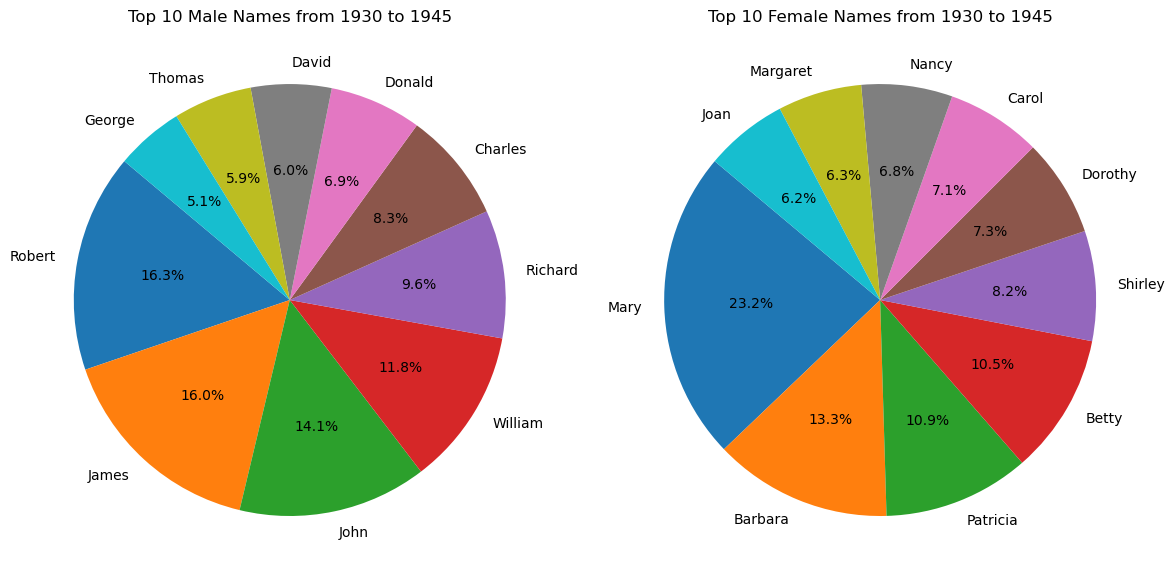

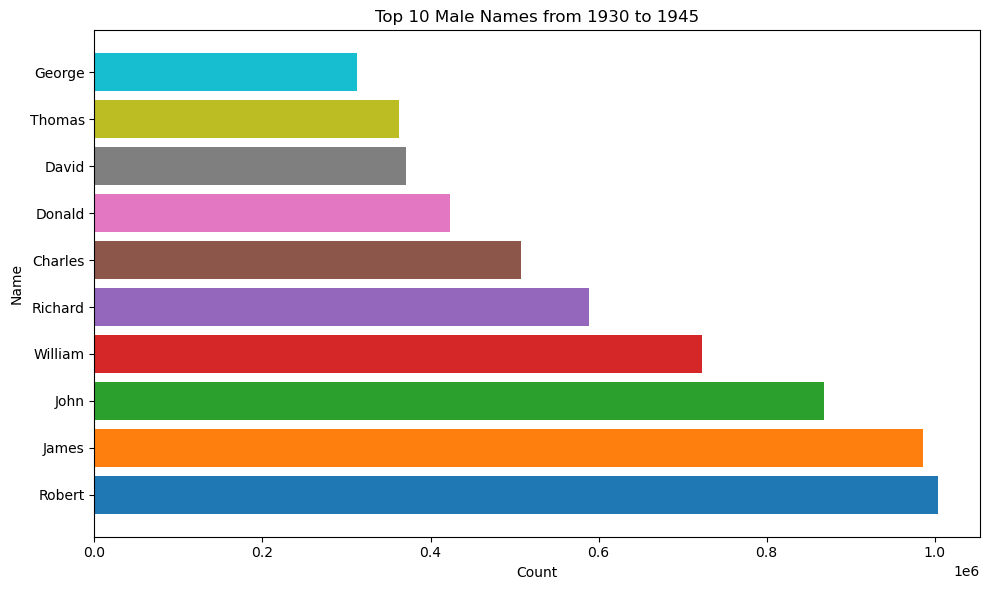

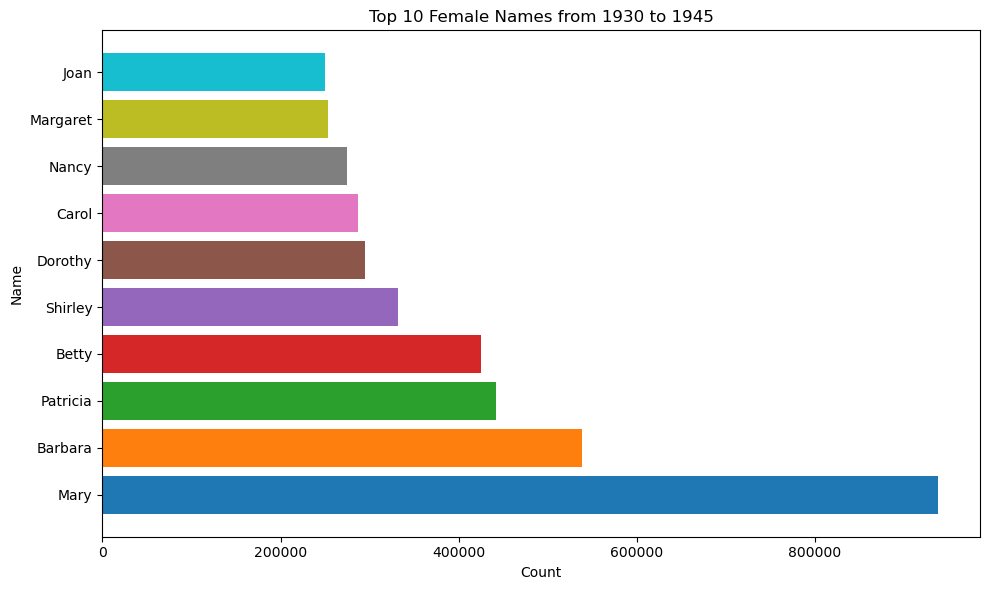

In [76]:
filtered_df = df[(df['Year'] >= 1930) & (df['Year'] <= 1945)]

name_counts = filtered_df.groupby(['Gender', 'Name'])['Count'].sum()

top_male_names = name_counts.loc['M'].nlargest(10)
top_female_names = name_counts.loc['F'].nlargest(10)

colors = plt.cm.tab10.colors

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(top_male_names, labels=top_male_names.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Male Names from 1930 to 1945')

plt.subplot(1, 2, 2)
plt.pie(top_female_names, labels=top_female_names.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Female Names from 1930 to 1945')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(top_male_names.index, top_male_names.values, color=colors)
plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Top 10 Male Names from 1930 to 1945')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(top_female_names.index, top_female_names.values, color=colors)
plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Top 10 Female Names from 1930 to 1945')

plt.tight_layout()
plt.show()